**Câu 1** A


In [2]:
import numpy as np

def compute_mean(lst):
  return np.sum(lst) / len(lst)

lst = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]

print("Mean : ", compute_mean(lst))

Mean :  1.8


**Câu 2** B

In [3]:
def compute_median(lst):
  size = len(lst)
  lst = np.sort(lst)
  print(lst)
  if (size % 2 == 0):
    return (1/2*(lst[int(size/2)-1] \
                 + (lst[int(size/2) + 1 - 1])))
  else:
    return lst[int((size+1)/2)-1]

lst = [1, 5, 4, 4, 9, 13]
print("Median: ", compute_median(lst))

[ 1  4  4  5  9 13]
Median:  4.5


**Câu 3** C

In [4]:
def compute_std(lst):
  mean = compute_mean(lst)
  variance = 0
  for i in lst:
    variance = variance + (i - mean)**2
  variance = variance / len(lst)
  return np.sqrt(variance)

lst = [ 171, 176, 155, 167, 169, 182]
print(np.round(compute_std(lst),2))

8.33


**Câu 4** D

In [5]:
def compute_correlation_cofficient(array1, array2):
  N = len(array1)
  numerator = N * array1.dot(array2) - np.sum(array1)*np.sum(array2)
  denominator = np.sqrt(N*np.sum(np.square(array1))-np.sum(array1)**2) \
    * np.sqrt(N*np.sum(np.square(array2))-np.sum(array2)**2)

  return np.round(numerator / denominator,2)

array1 = np.asarray([-2, -5, -11, 6, 4, 15, 9])
array2 = np.asarray([4, 25, 121, 36, 16, 225, 81])
print("Correlation: ", compute_correlation_cofficient(array1,array2))

Correlation:  0.42


**Câu 5** B

In [8]:
import pandas as pd
import numpy as np

data = pd. read_csv ("D:/AIO/AIO-Exercise/module2/week4/advertising.csv")

def correlation (x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

  if denominator == 0:
    return 0  # Handle cases where the denominator is zero

  return numerator / denominator

x = data ['TV']
y = data ['Radio']
corr_xy = correlation (x, y)
print (f" Correlation between TV and Sales : { round ( corr_xy , 2)}")

 Correlation between TV and Sales : 0.05


**Câu 6** D

In [10]:
features = ['TV', 'Radio', 'Newspaper']
for feature_1 in features :
    for feature_2 in features :
        correlation_value = correlation ( data [ feature_1 ], data [ feature_2 ])
        print (f" Correlation between { feature_1 } and { feature_2 }: { round (
correlation_value , 2)}")

 Correlation between TV and TV: 1.0
 Correlation between TV and Radio: 0.05
 Correlation between TV and Newspaper: 0.06
 Correlation between Radio and TV: 0.05
 Correlation between Radio and Radio: 1.0
 Correlation between Radio and Newspaper: 0.35
 Correlation between Newspaper and TV: 0.06
 Correlation between Newspaper and Radio: 0.35
 Correlation between Newspaper and Newspaper: 1.0


**Câu 7** C

In [14]:
x = data ['Radio']
y = data ['Newspaper']

result = np.corrcoef(x, y)
print ( result )

[[1.         0.35410375]
 [0.35410375 1.        ]]


**Câu 8** D

In [15]:
data_corr_coef = data.corr()
data_corr_coef

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


**Câu 9** D

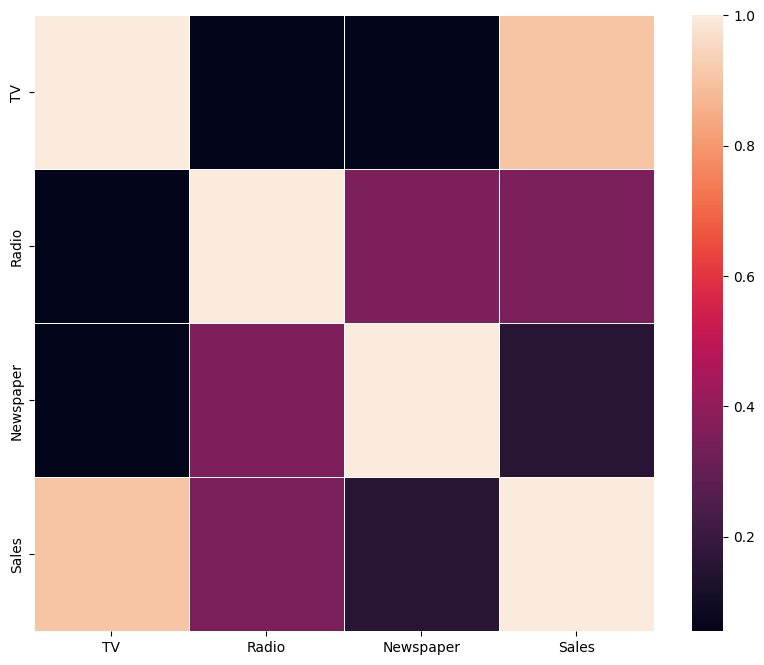

In [21]:
import matplotlib . pyplot as plt
import seaborn as sns

plt.figure (figsize =(10 ,8))
sns.heatmap(data_corr_coef, annot=False, fmt=".2f", linewidth=.5)
plt.show ()

**Câu 10** B

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vi_data_df = pd. read_csv ("D:/AIO/AIO-Exercise/module2/week4/vi_text_retrieval.csv")
context = vi_data_df ['text']
context = [doc.lower() for doc in context ]

tfidf_vectorizer = TfidfVectorizer ()
context_embedded = tfidf_vectorizer.fit_transform(context)
context_embedded.toarray()[7][0]

0.31126580760710637

**Câu 11** D

In [18]:
def tfidf_search (question , tfidf_vectorizer , top_d =5):
    # lowercasing before encoding
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    cosine_scores = cosine_similarity(context_embedded, query_embedded).reshape((-1,))

    # Get top k cosine score and index its
    results = []
    for idx in cosine_scores . argsort ()[- top_d :][:: -1]:
        doc_score = {'id': idx, 'cosine_score': cosine_scores [idx]}
        results . append ( doc_score )
    return results

question = vi_data_df.iloc [0]['question']
results = tfidf_search (question, tfidf_vectorizer, top_d =5)
results[0]['cosine_score']

0.6279910475266973

**Câu 12** B

In [20]:
def corr_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    corr_scores = np.corrcoef(
        query_embedded.toarray()[0],
        context_embedded.toarray()
    )
    corr_scores = corr_scores[0][1:]
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'corr_score':corr_scores[idx]
        }
        results.append(doc)
    return results

question = vi_data_df.iloc[0]['question']
results = corr_search(question , tfidf_vectorizer , top_d =5)
results [1]['corr_score']

0.20734246471973253